# Create PyWGCNA object

In [1]:
import PyWGCNA
import pandas as pd
import numpy as np
import random

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Read in matrix made from all 48 samples
TPM = pd.read_csv("/data/class/cosmos2023/PUBLIC/shai_hulud/data/mirna/actual_data/mirna_cpm_matrix.csv", index_col = 0)
TPM['gene_id'] = TPM.index.str.split('.').str[0]

# WGCNA requires gene id
TPM = TPM.set_index(TPM['gene_id'])

# df can only have numbers, no strings
TPM.drop(["gene_id"], axis = 1, inplace=True)

# samples in rows, genes in columns
TPM = TPM.T

In [3]:
TPM.head()

gene_id,ENSMUSG00000093015,ENSMUSG00000093970,ENSMUSG00000076135,ENSMUSG00000098555,ENSMUSG00000099183,ENSMUSG00000095853,ENSMUSG00000065559,ENSMUSG00000065480,ENSMUSG00000065405,ENSMUSG00000065567,...,ENSMUSG00000093301,ENSMUSG00000092752,ENSMUSG00000104948,ENSMUSG00000076371,ENSMUSG00000106618,ENSMUSG00000093335,ENSMUSG00000098514,ENSMUSG00000098966,ENSMUSG00000098868,ENSMUSG00000099228
ENCFF784UWQ,0.0,0.0,0.0,0.0,0.447441,0.0,2639.377858,90.718593,8320.382723,197.209469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENCFF094EFP,0.0,0.0,0.0,0.0,0.270617,0.0,1045.323936,20.702163,8960.112750,97.421945,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENCFF810XKL,0.0,0.0,0.0,0.0,0.410765,0.0,147941.708351,91.189811,5345.900001,43.746464,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENCFF641TJV,0.0,0.0,0.0,0.0,1.046254,0.0,135352.621730,97.563221,4410.223789,62.775263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENCFF859KXI,0.0,0.0,0.0,0.0,0.255020,0.0,166440.591432,108.893542,4284.336085,47.433721,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Read in metadata file; only really care about certain columns for plotting purposes
metadata = pd.read_csv("/data/class/cosmos2023/PUBLIC/shai_hulud/data/mirna/actual_data/mirna_metadata.csv",
                      usecols=['File.accession', 'Biosample.term.name', 'Age'])

metadata['Age'] = metadata['Age'].str.replace('_', ' ') # no underscores

# set index to be run name (no underscores)
metadata.index = metadata['File.accession']

# Replace underscores with spaces in column names
metadata.drop(["File.accession"], axis = 1, inplace=True)

In [5]:
metadata.head()

,Biosample.term.name,Age
File.accession,,
ENCFF784UWQ,C2C12,0hr
ENCFF094EFP,C2C12,0hr
ENCFF810XKL,gastrocnemius,PND 04
ENCFF641TJV,gastrocnemius,PND 04
ENCFF859KXI,gastrocnemius,PND 04


# Make pyWGCNA object

In [6]:
mirna = PyWGCNA.WGCNA(name='mirna', 
                        species='Mouse', 
                        geneExp=TPM, 
                        save=True)

Saving data to be True, checking requirements ...
Figure directory does not exist!
Creating figure directory!


# Preprocess including removing outlier genes and samples

Pre-processing...
	Detecting genes and samples with too many missing values...
	Done pre-processing..



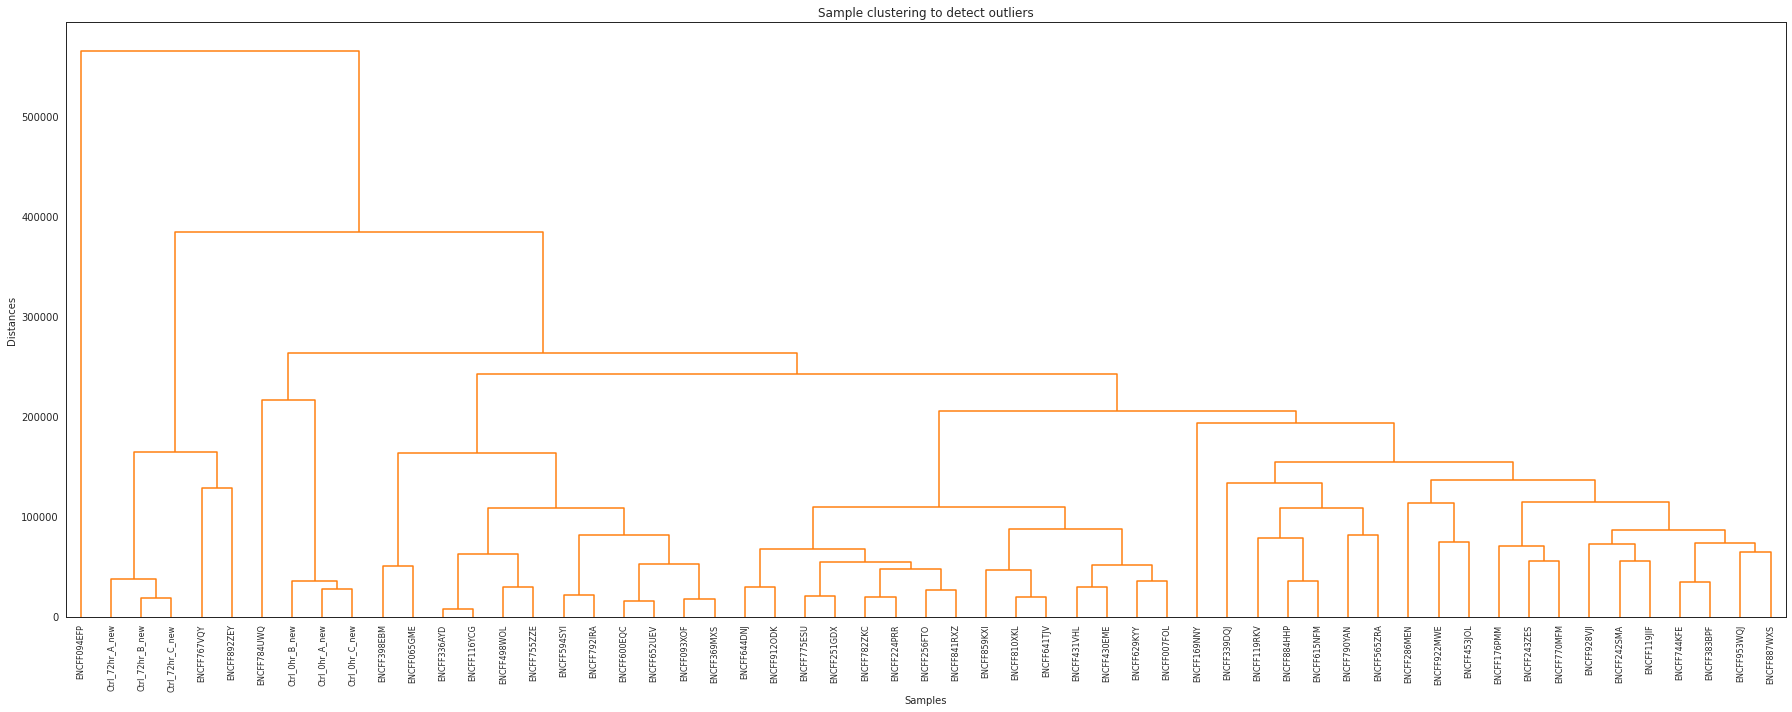

In [7]:
mirna.preprocess()

# Running PyWGCNA and finding modules

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  832
    Power  SFT.R.sq     slope truncated R.sq     mean(k)   median(k)  \
0       1  0.020647  0.190059       0.746718  113.008105  111.844275   
1       2  0.299278  -0.44118       0.787515   51.598888   46.028613   
2       3  0.667609 -0.780899       0.840437   29.362271   25.024829   
3       4  0.802235 -0.907724        0.92298    18.93928   14.136689   
4       5  0.842018  -0.98792       0.914628   13.237541    8.704411   
5       6  0.860383 -1.011747       0.917115     9.77948    5.735504   
6       7  0.891953  -0.99188       0.928437    7.522015    3.784152   
7       8  0.916161 -0.998794       0.940127    5.965122    2.491996   
8       9  0.937086 -0.981338       0.945229    4.844899    1.732087   
9      10  0.944279 -0.959747       0.948266    4.011319    1.254601   
10     11  0.957405 -0.941895       0.955038    3.373902    0.925155   
11     13  0.946285 -0.960462     

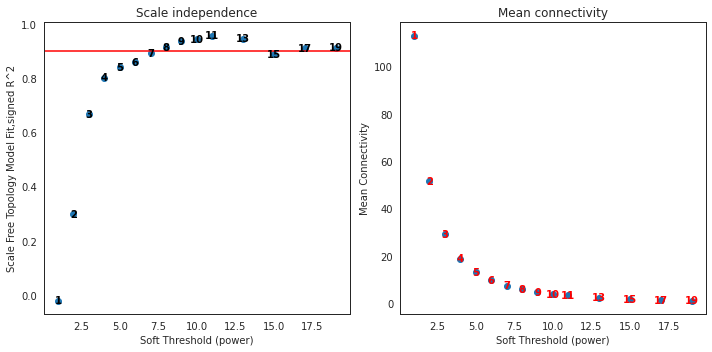

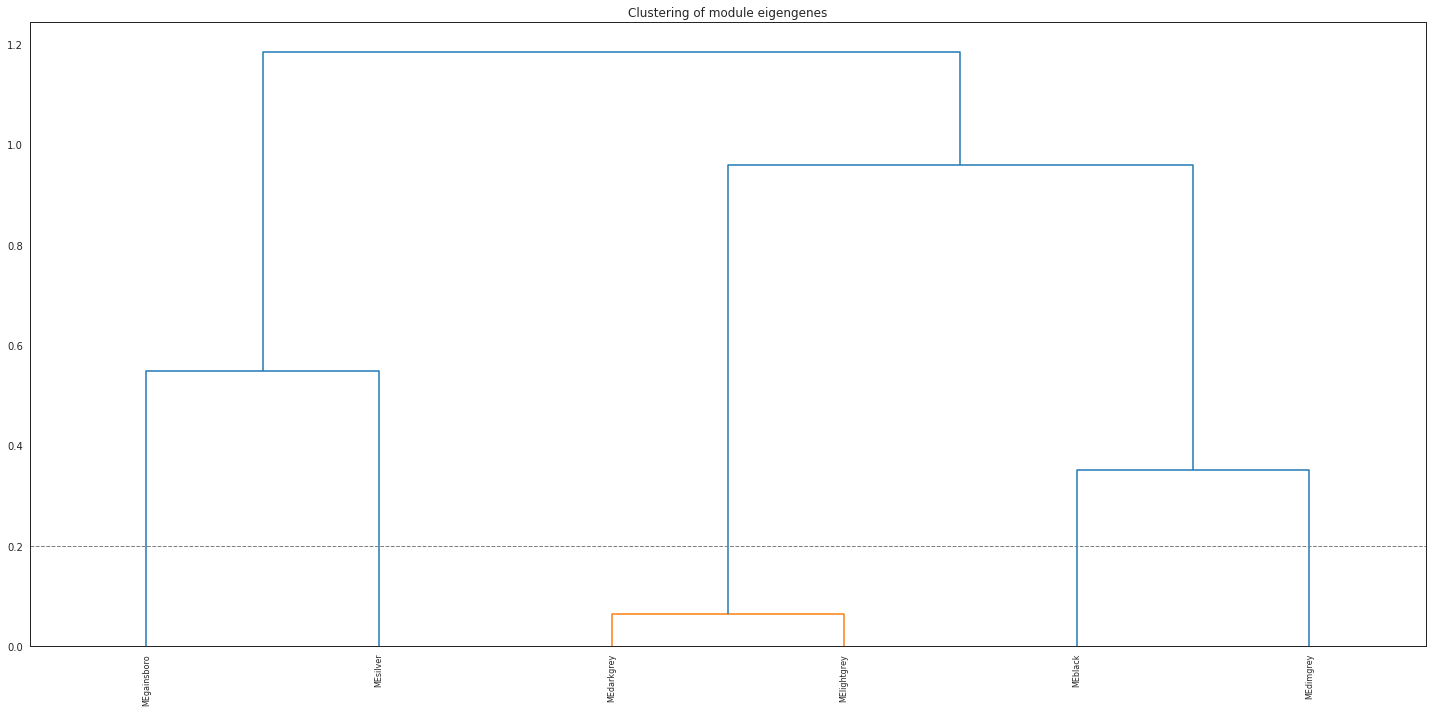

In [8]:
## Running PyWGCNA and finding modules
mirna.findModules()

In [9]:
mirna.updateSampleInfo(sampleInfo=metadata)
# add color for metadata
mirna.setMetadataColor('Biosample.term.name', 
                      {"C2C12": "blue", 
                       "gastrocnemius": "green",
                       "limb": "red",
                       "myotube" : "purple",
                       "skeletal muscle tissue" : "yellow"})
mirna.setMetadataColor('Age', 
                      {'0hr': '#E41A1C',
                       '72hr': '#8D4C6A',
                       'ED 10.5': '#377EB8',
                       'ED 11.5': '#419681',
                       'ED 12.5': '#4DAF4A',
                       'ED 13.5': '#727E76',
                       'ED 14.5': '#984EA3',
                       'ED 15.5': '#CB6651',
                       'PND 0': '#FF7F00',
                       'PND 04': '#FFBF19',
                       'PND 10': '#FFFF33',
                       'PND 14': '#D2AA2D',
                       'PND 25': '#A65628',
                       'PND 36': '#CE6B73',
                       'PNM 02': '#F781BF',
                       'PNM 08': '#C88DAC',
                       'PNM 18-20': '#999999'
                      })

geneList = PyWGCNA.getGeneList(dataset='mmusculus_gene_ensembl',
                              attributes=['ensembl_gene_id', 
                                           'external_gene_name', 
                                           'gene_biotype'])


# Analyzing results including plotting module-trait relationship heatmap, eigengene heatmap and barplot, and GO term analysis for each module

Analysing WGCNA...
Calculating module trait relationship ...
	Done..

Adding (signed) eigengene-based connectivity (module membership) ...
	Done..

Updating gene information based on given gene list ...
	Done..

plotting module heatmap eigengene...
	Done..

plotting module barplot eigengene...
	Done..

doing Enrichr GO analysis for each module...
GO directory does not exist!
Creating GO directory!
No enrich terms when cutoff = 1 in module black
No enrich terms when cutoff = 1 in module darkgrey
No enrich terms when cutoff = 1 in module dimgrey
No enrich terms when cutoff = 1 in module gainsboro
No enrich terms when cutoff = 1 in module silver
	Done..



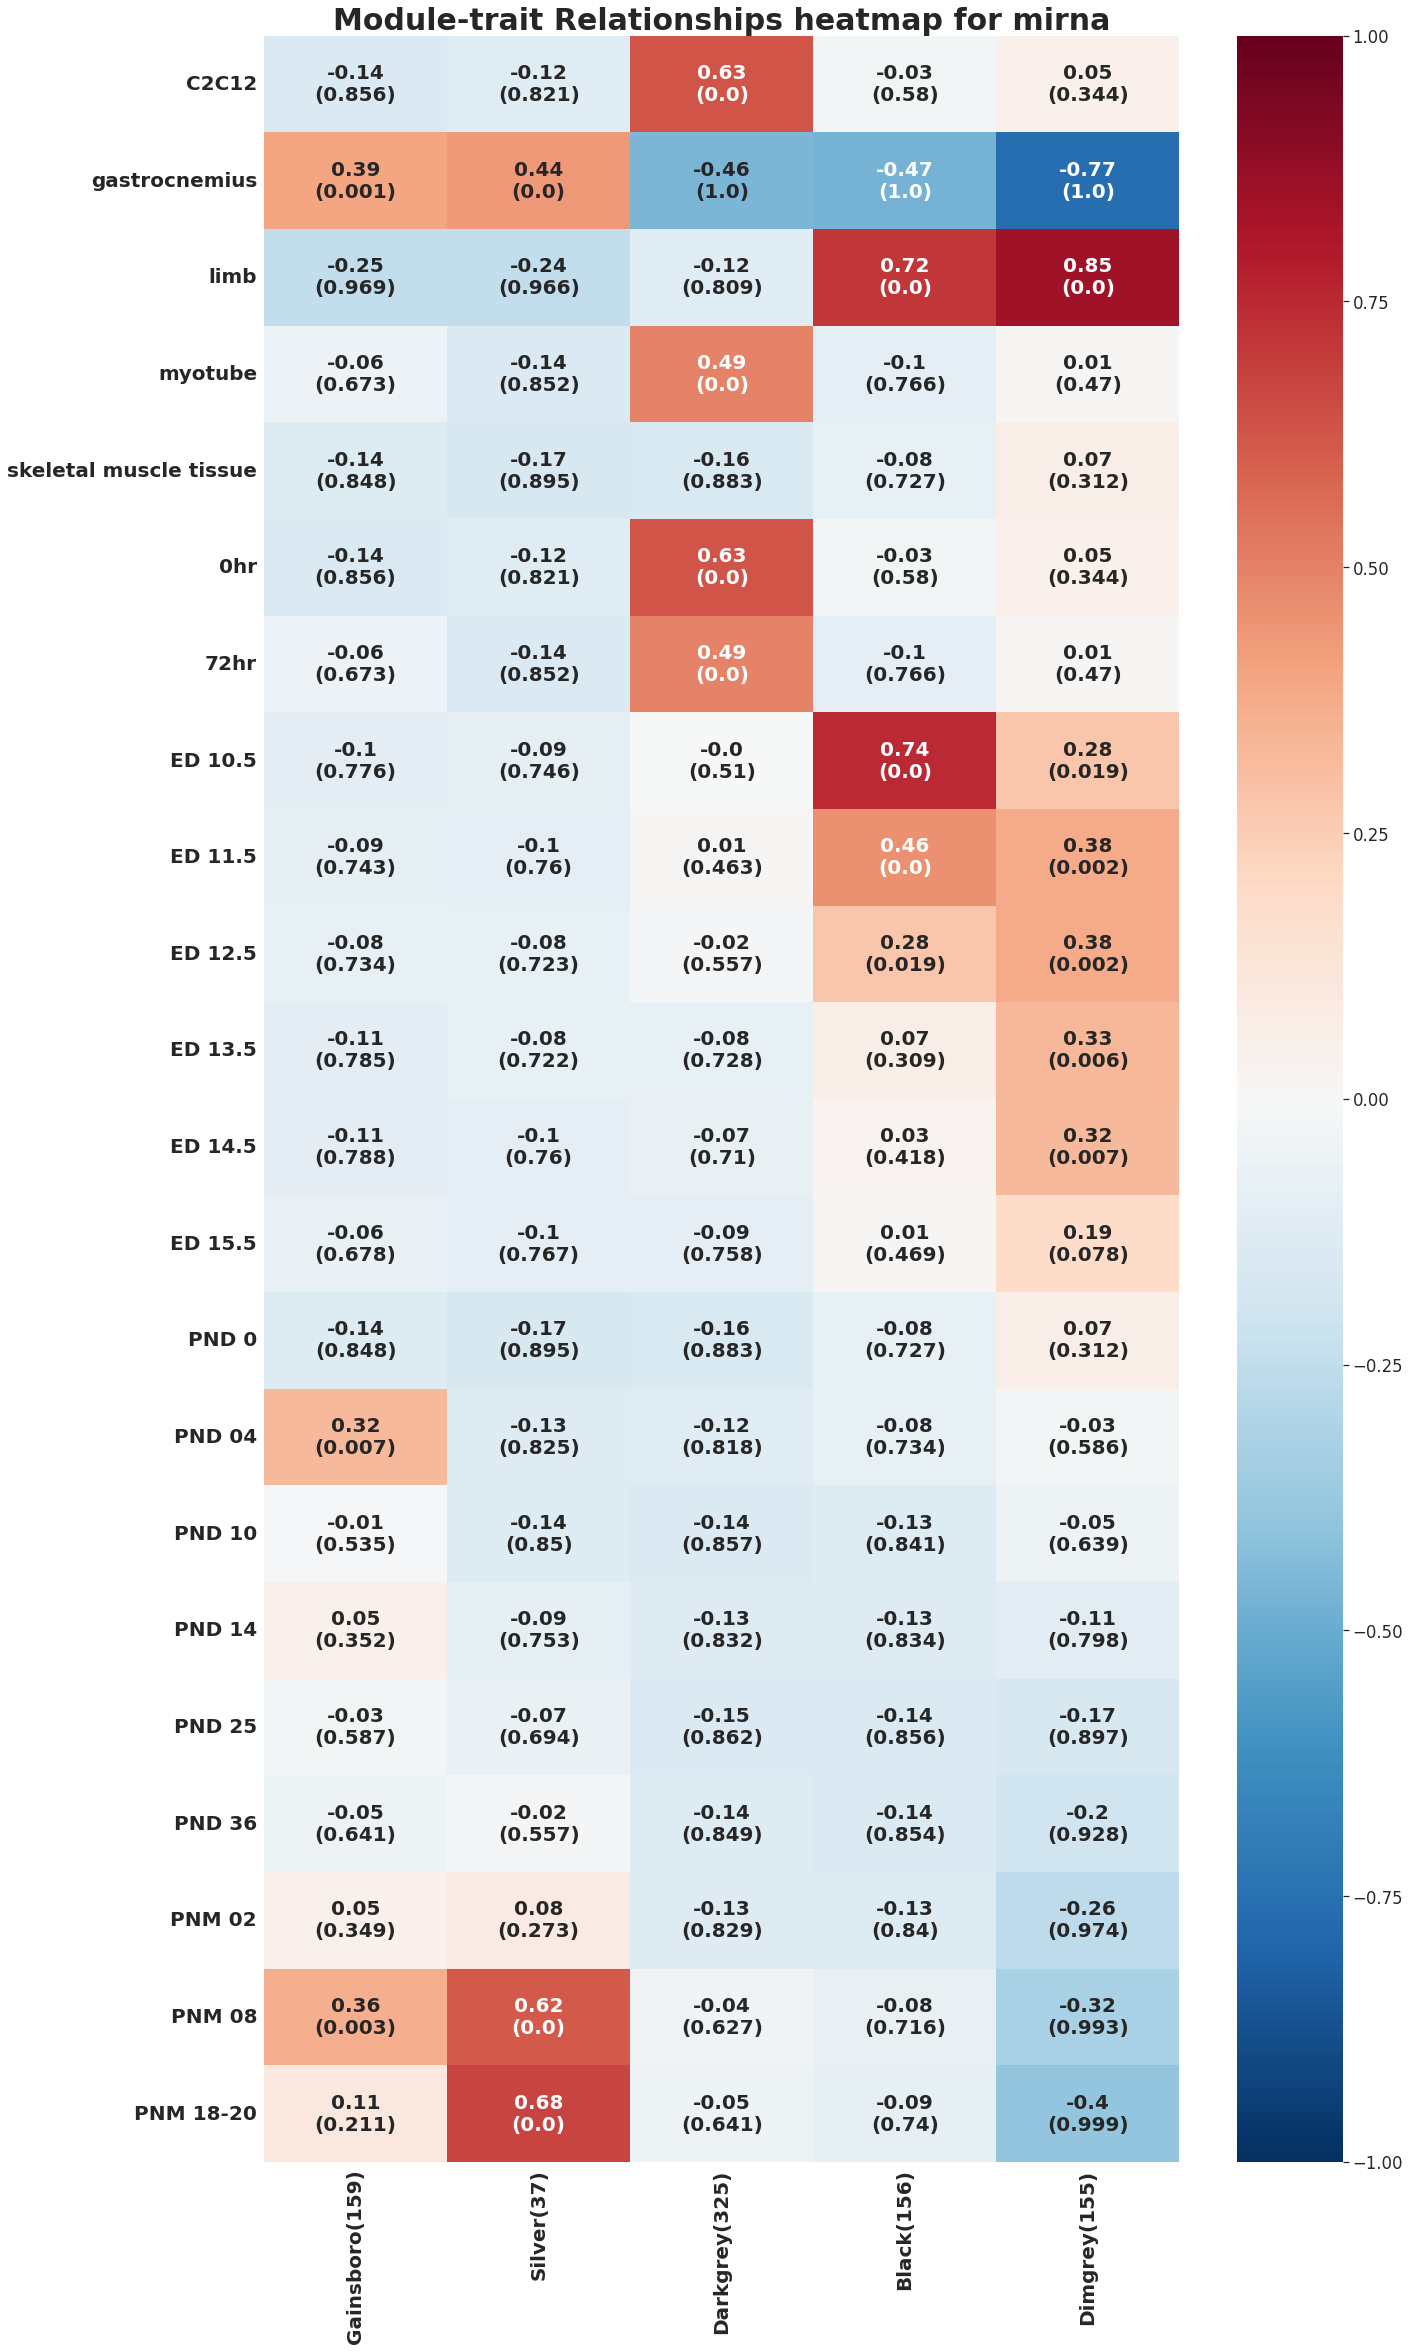

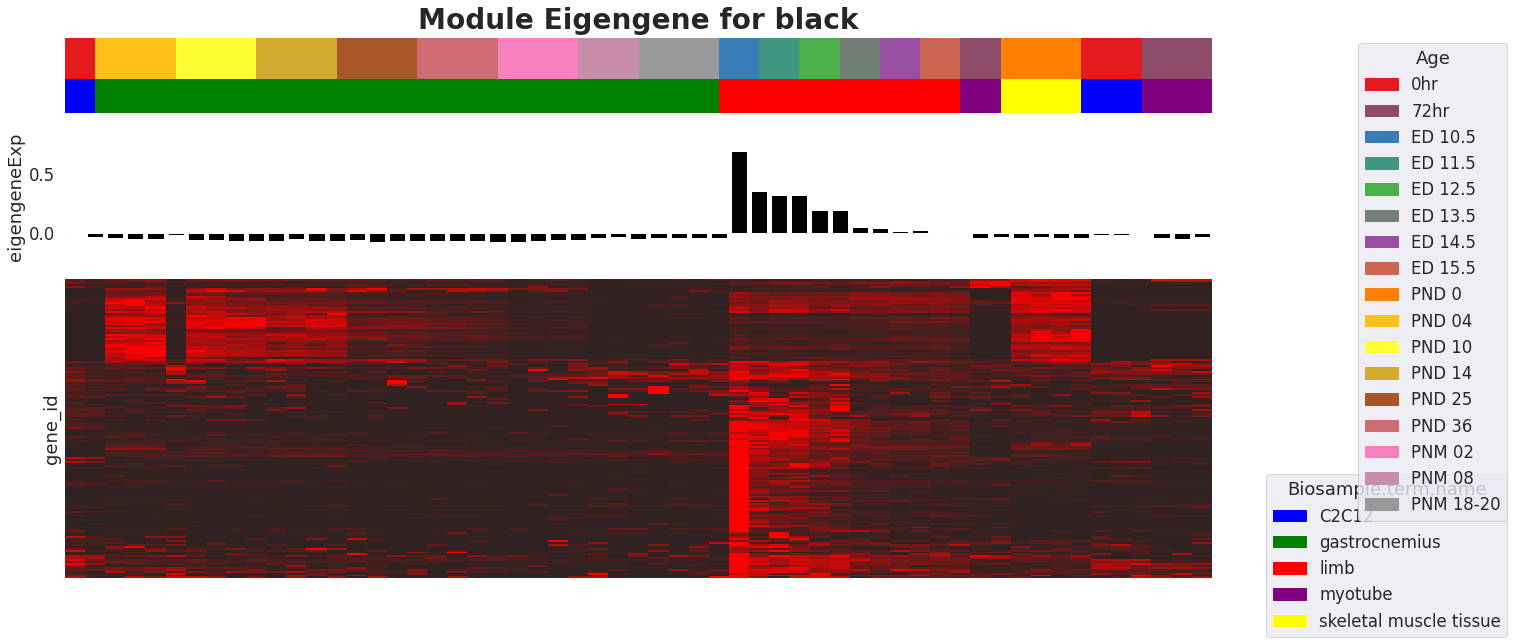

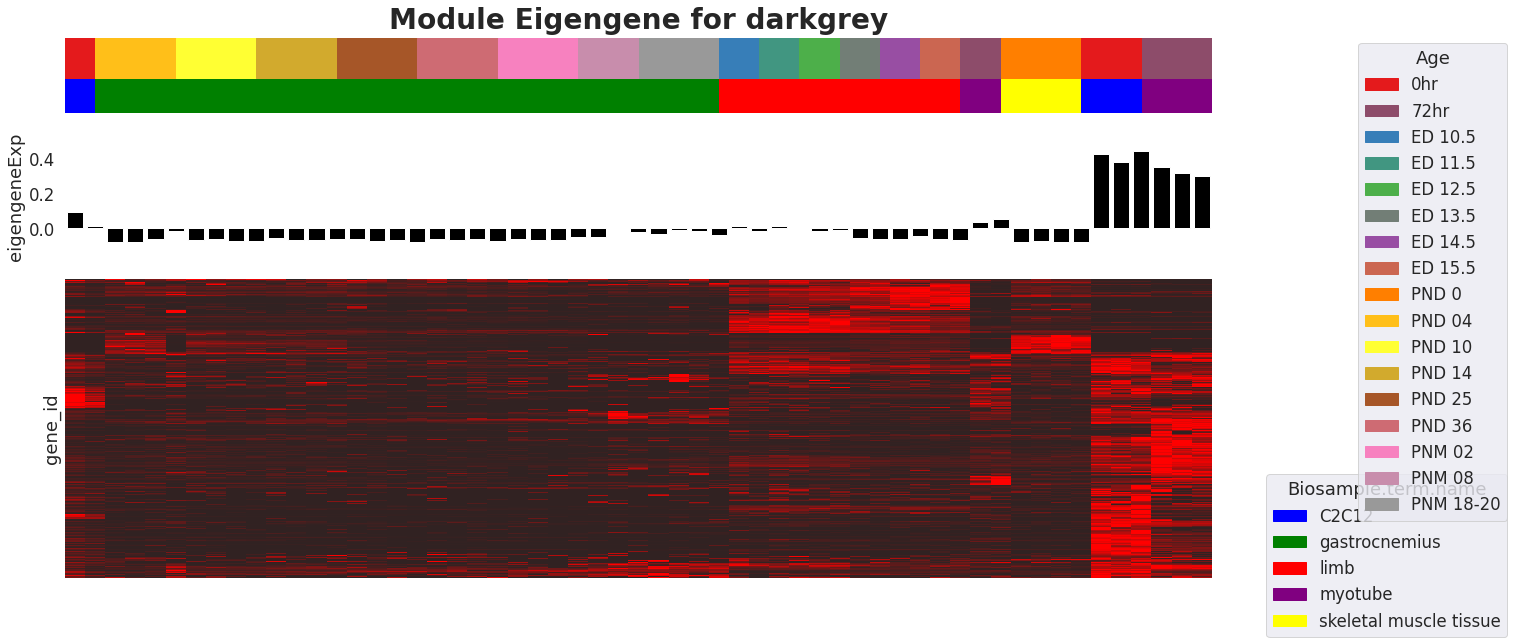

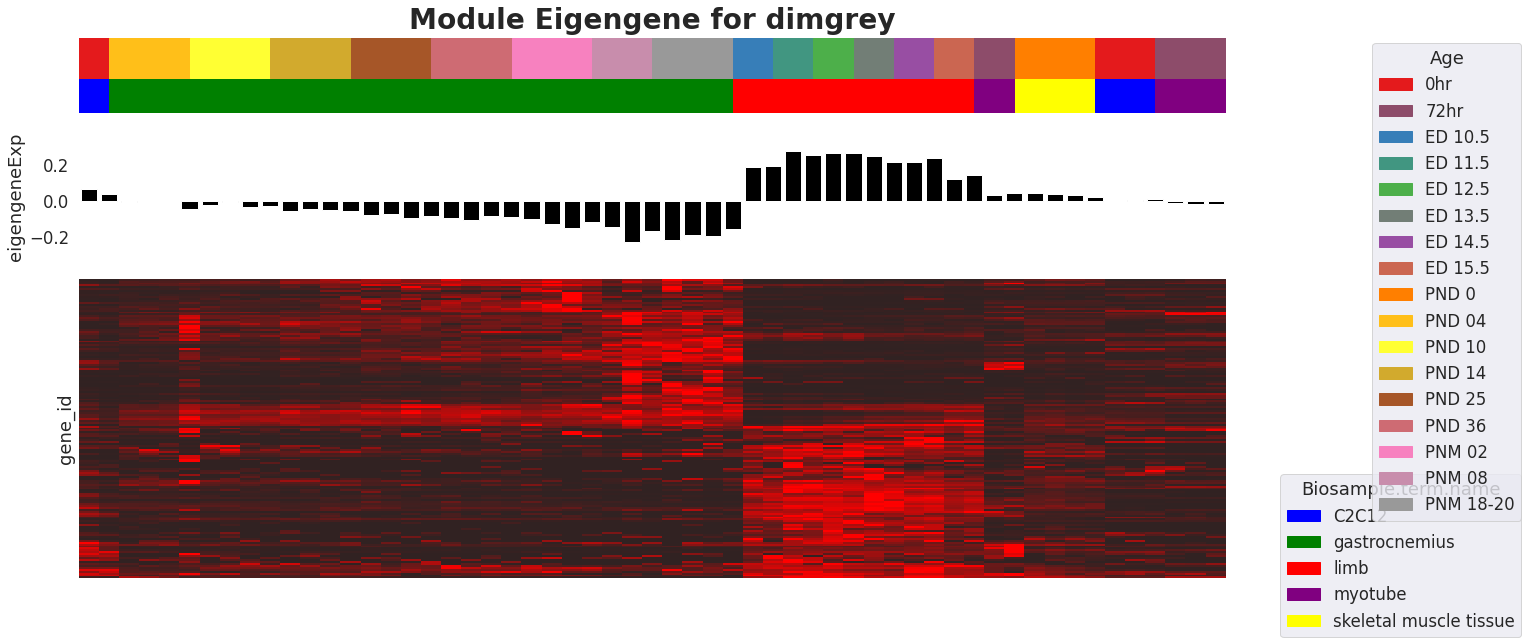

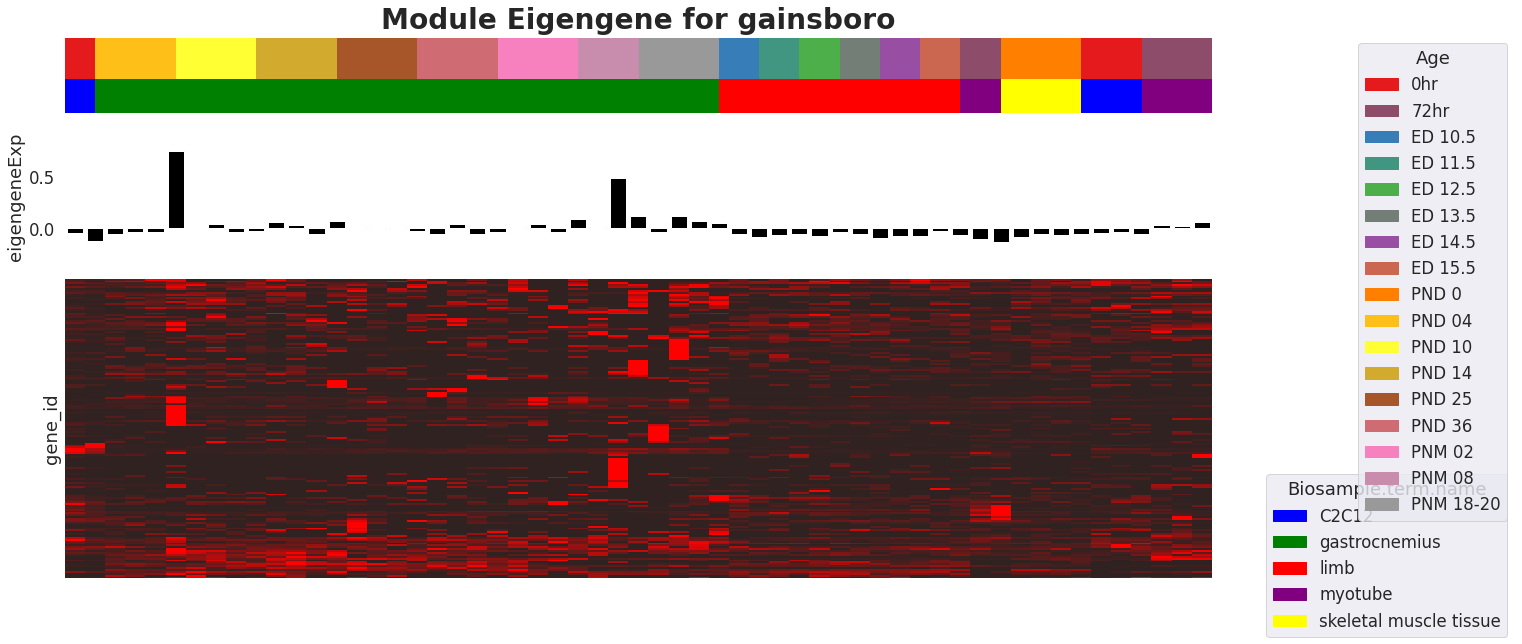

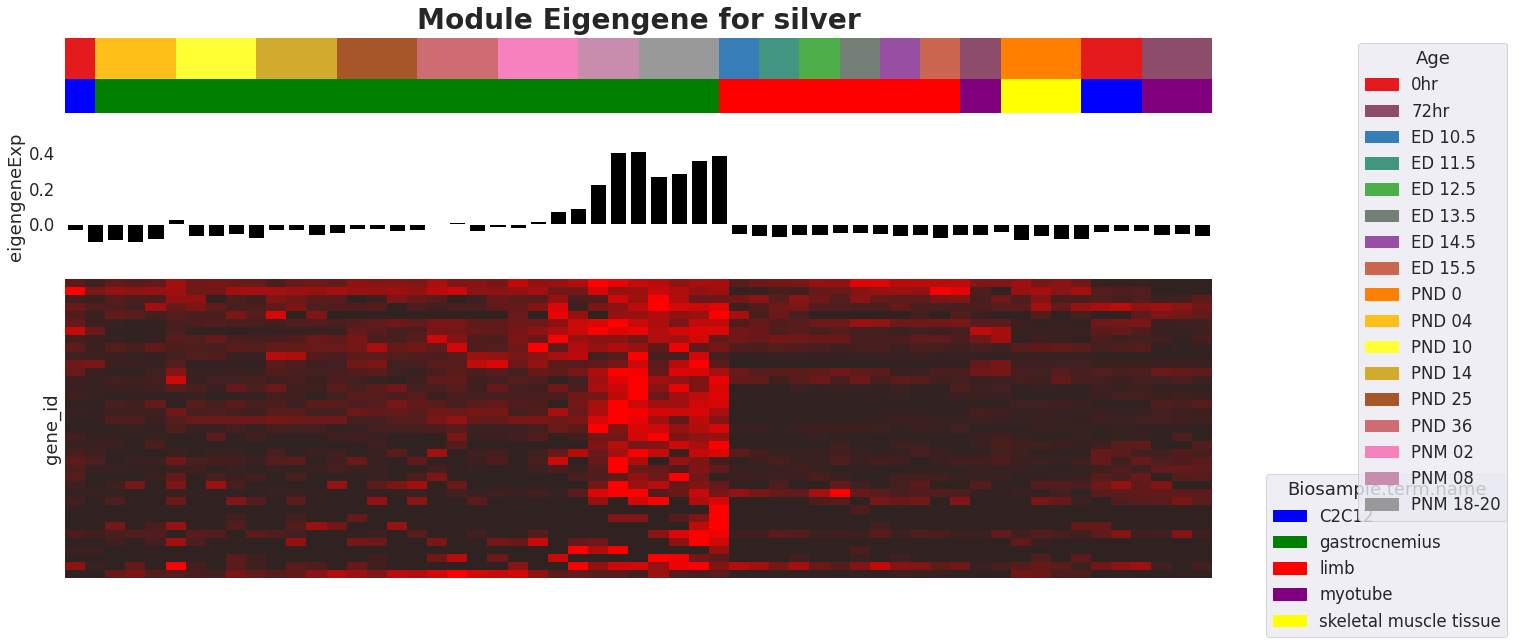

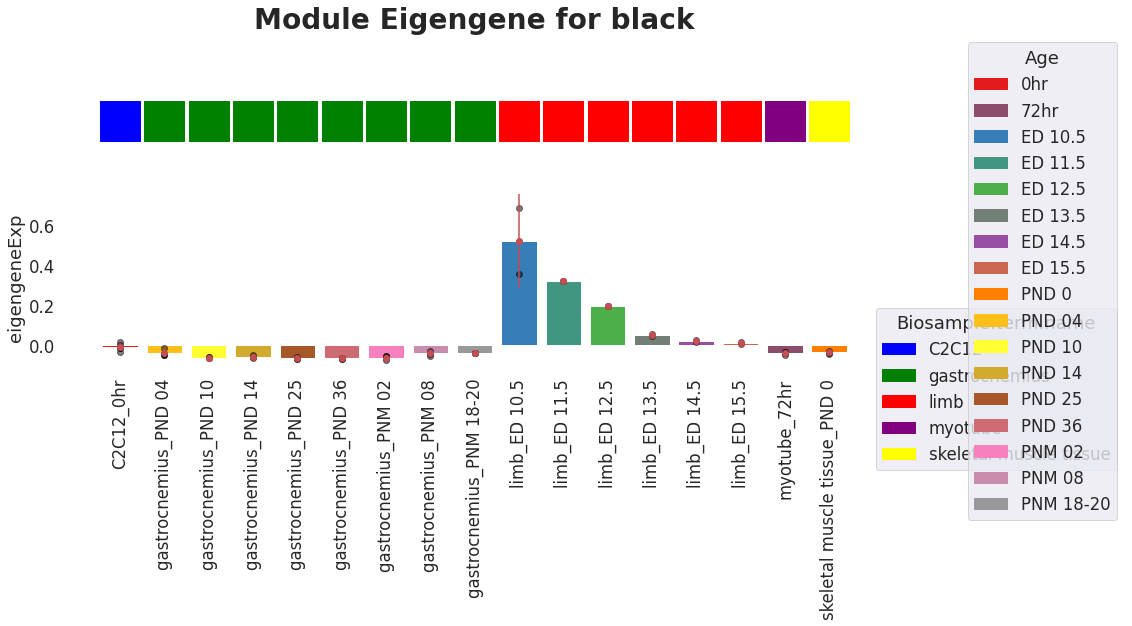

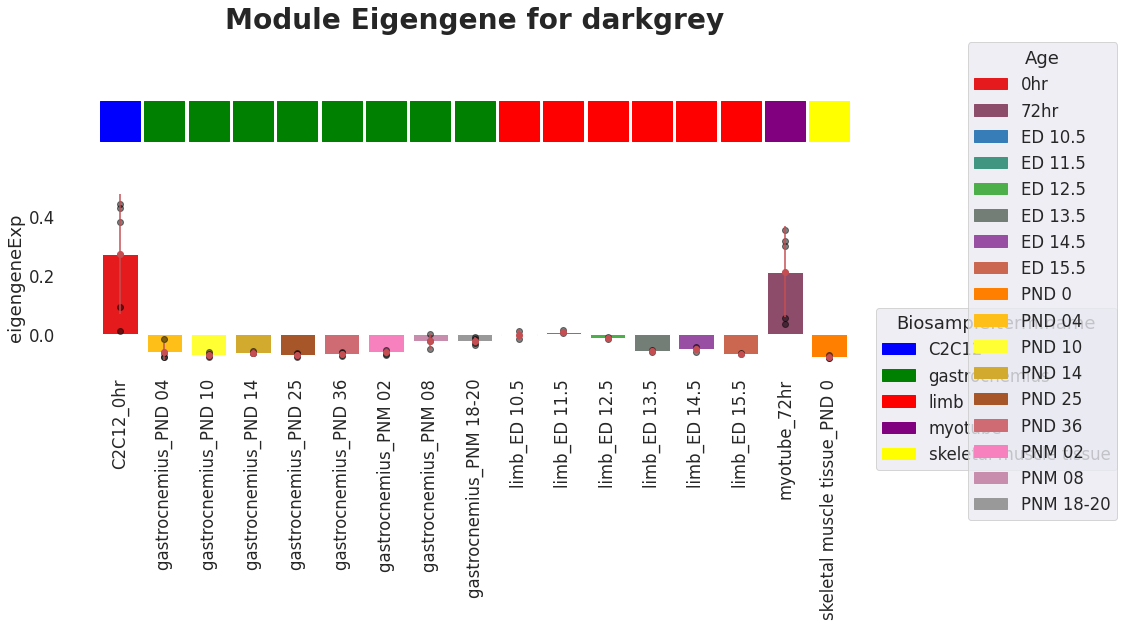

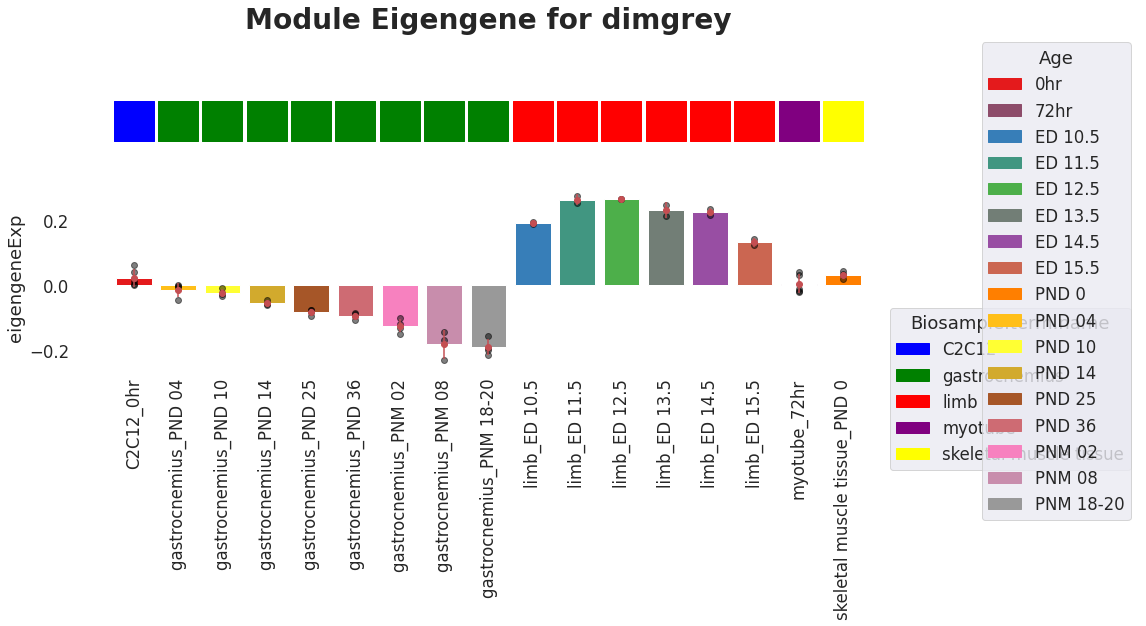

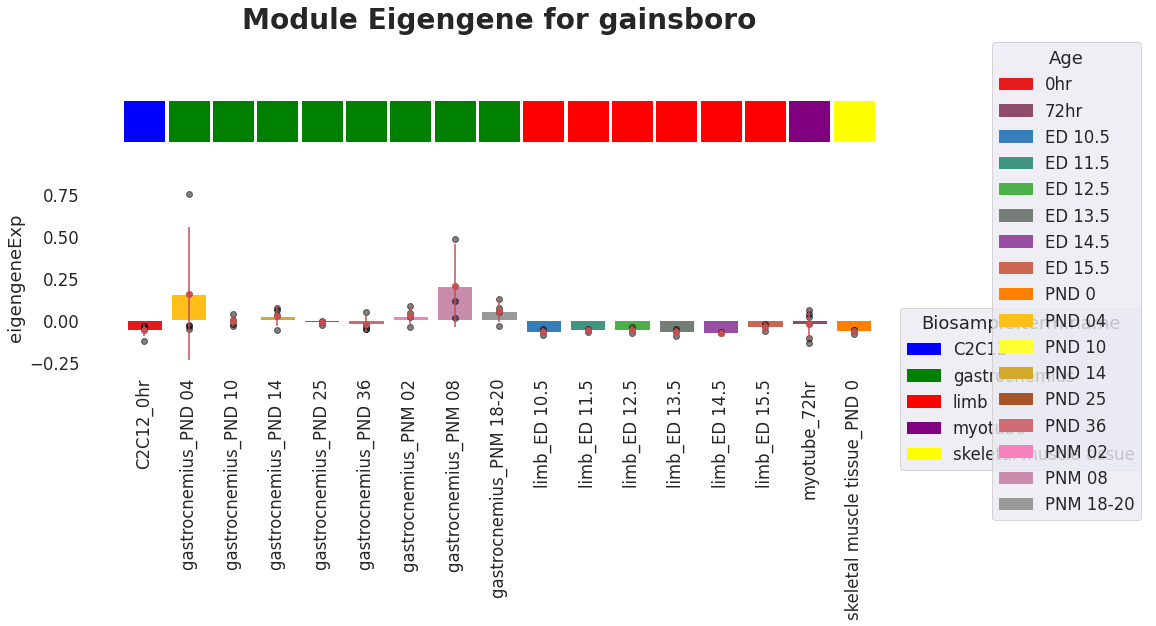

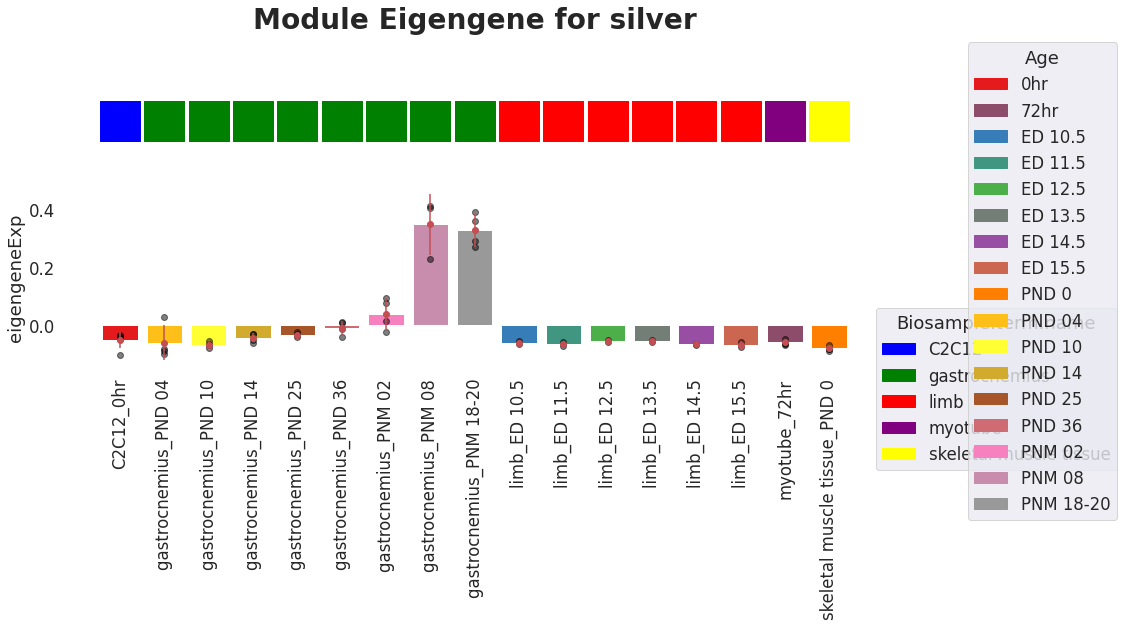

In [10]:
mirna.analyseWGCNA(geneList=geneList)

# save PyWGCNA object

In [11]:
mirna.saveWGCNA()

Saving WGCNA as mirna.p


# Read PyWGCNA object

In [12]:
## Read PyWGCNA object
import sys
import PyWGCNA
mirna = PyWGCNA.readWGCNA("mirna.p")

Reading mirna WGCNA done!


# How to work with object

## Extract gene list for each module and save it as a csv file

In [13]:
# module you're interested in
module = "silver"
geneList = mirna.datExpr.var[mirna.datExpr.var.moduleColors == module]
geneList.head()
# save gene list as MODULE.csv near object file
geneList.to_csv(mirna.outputPath + '/' + module + '.csv')